In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interp
import importlib
import sys
import time 
sys.path.append('../')


try:
    importlib.reload(star_props.helium_flash)
except NameError:
    import star_props.helium_flash
except Exception as e:
    print("Unexpected error during reload")
    print(e)
    
from scipy.interpolate import NearestNDInterpolator
from star_props.helium_flash import HeliumDeflagration as deflag
from star_props.helium_flash import HeliumFlash 
from star_props.helium_flash import Star
from star_props.helium_flash import DarkMatter 

form = lambda x: np.format_float_scientific(x,precision=3)

from mpl_toolkits.axes_grid1 import make_axes_locatable

matplotlib.rcParams['figure.figsize'] = [20.0, 15.0]
matplotlib.rcParams.update({'font.size': 22})


Rsol2cm = 6.957e10
Msol2g = 1.989e33
gev2g = 1.7826619e-24


In [3]:
def timer(func):
    def time_and_call(*args,**kwargs):
        t0 = time.clock()
        result = func(*args,**kwargs)
        t1=time.clock()
        print("{0} m, {1} s ".format( int((t1-t0)/60), (t1-t0)%60 )  )
        return result
    return time_and_call

In [ ]:
rhos = np.geomspace(1e3,1e7,num=10)
tcolds = np.geomspace(1e4,1e9,num=10)
R,T = np.meshgrid(rhos,tcolds)


Temps = np.array([7.0e8])  
trig = lambda rho, tcold: min([deflag(rho,tcold,tcrit = T).trigger() for T in Temps])
trig = np.vectorize(timer(trig))

dEdxMIN = trig(R,T)

0 m, 2.1040160000000014 s 
0 m, 2.1170410000000004 s 
0 m, 2.0593649999999855 s 
0 m, 5.466600999999997 s 
0 m, 5.189823999999987 s 


In [32]:
fdEdxMIN = interp.interp2d(np.log10(rhos),np.log10(tcolds),np.log10(dEdxMIN),kind='quintic',bounds_error=False, fill_value=1e100)
rhotest, ttest = [5e3,5e7]
interpdEdx=pow(10,fdEdxMIN(np.log10(rhotest),np.log10(ttest)))
testdEdx = trig(rhotest,ttest)
print("dEdx: ",testdEdx, interpdEdx,"\nError:", (interpdEdx/testdEdx-1)*100)

0 m, 1.0046289999999942 s 
dEdx:  5.204307283935968e+30 [3.76e+30] 
Error: [-27.77]


In [22]:
print(rhos,'\n',tcolds)

[1.00e+03 2.78e+03 7.74e+03 2.15e+04 5.99e+04 1.67e+05 4.64e+05 1.29e+06
 3.59e+06 1.00e+07] 
 [1.00e+04 3.59e+04 1.29e+05 4.64e+05 1.67e+06 5.99e+06 2.15e+07 7.74e+07
 2.78e+08 1.00e+09]


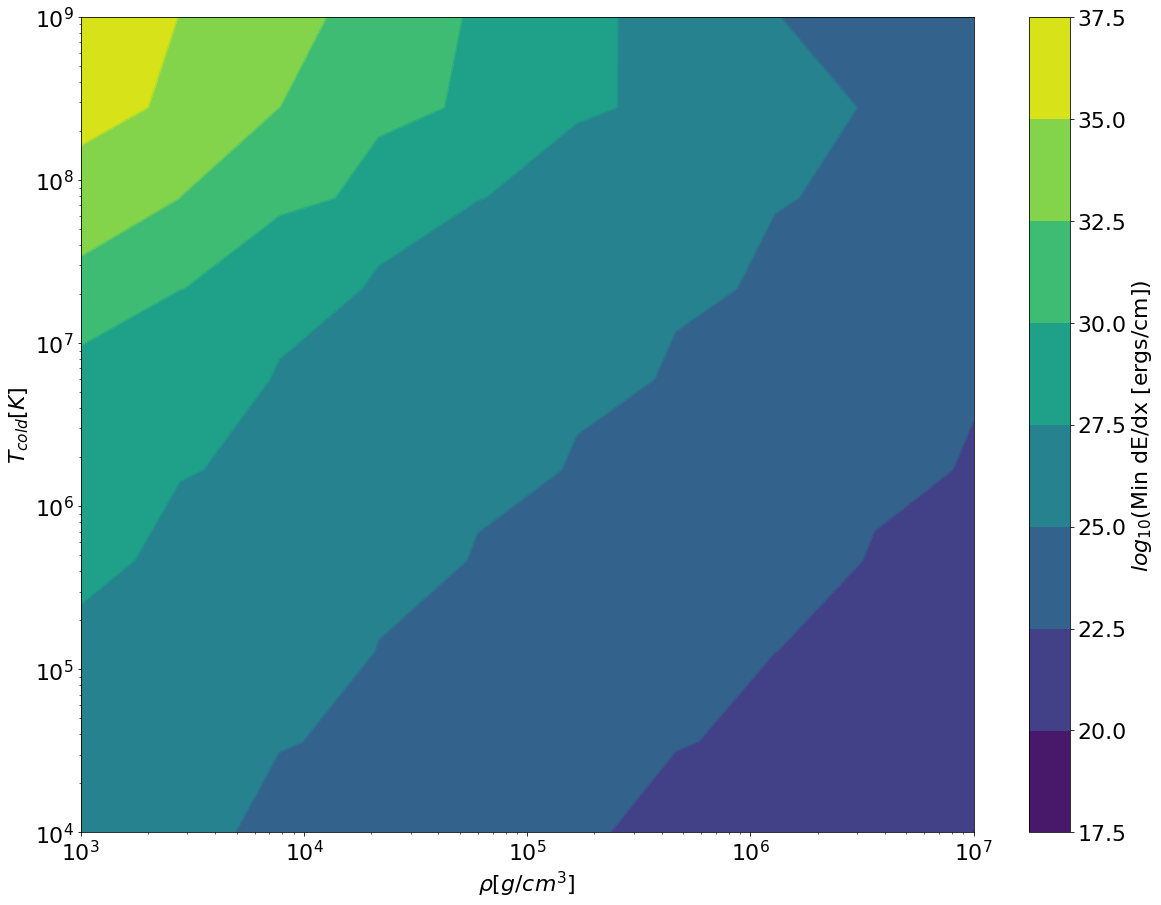

In [9]:
plt.contour(R,T,np.log10(dEdxMIN))
cfill=plt.contourf(R,T,np.log10(dEdxMIN))
cbar = plt.colorbar(cfill)
cbar.ax.set_ylabel(r"$log_{10}$(Min dE/dx [ergs/cm])")
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\rho [g/cm^3] $')
plt.ylabel(r'$T_{cold} [K] $')

plt.show()